# Project 04 - Identify Fraud from Enron Email

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Project: Identify Fraud from Enron Email    
Course: Data Science - Foundations II  
COD: ND111  
Date: 12/02/2019    
Version: 2.0

***

# Synopsis

I have tested 6 classifiers and only one has reached the threshold of 0.30 for recall and precision. Using the classifier AdaBoost with two engineered features I have found the following metrics:

* Precision: 0.50032;
* Recall: 0.38900, and;
* Accuracy: 0.85721,

For the Features Selection, I have opted to use a non-standard way to select, creating a Genetic Algorithm to perform the selection based on the metrics (Accuracy, Precision, and Recall).

***

## Table of Contents
- [1. Introduction](#intro)
- [2. Data Wrangling](#wrangling)
    - [2.1. Data Gathering](#gathering)
    - [2.2. Data Assessing](#assessing)
    - [2.3. Data Cleaning](#cleaning)
        - [**Task 2** - Removing Outliers](#task2)    
    - [2.4. Exporing to JSON](#exporting)
- [3. Exploratory Data Analysis](#eda)
    - [3.1. Tableau Public](#story)
    - [3.2. Feature Engineering](#feature_engineering)
        - [**Task 3** - Creating new features](#task3)    
    - [3.3. Feature Scaling](#scaling)
    - [3.4. Feature Selection](#selection)
        - [**Task 1** - Feature List](#task1)
        - [**Task 4** - Try a varity of classifiers](#task4)    
    - [3.5. Dimension Reduce](#pca)        
- [4. Predicting](#predicting)
    - [4.1. Tuning Parameters](#tuning)
    - [4.2. Classifier Evaluation - Optimized Parameters](#evaluating_classifiers)
        - [**Task 5** - Tune your classifier](#task5)
        - [**Task 6** - Dump your classifier, dataset, and features_list](#task6)
- [5. Conclusions](#conclusions)
- [6. Questions](#questions)
- [References](#references)
- [Appendix](#appendix)
    - [Given code](#code)



***

# 1. Introduction <a id='intro'></a>

I have decided to use the Jupyter Notebook due to several reasons:

* Record the data manipulation;
* Data Wrangling;
* Data Visualization, and;
* Perform a Reproducible Research.

The original file (`poi_id.py`) was used in several pieces spread all over this document.

### 1.1. Reproducibility

I have written this report using the Jupyter Notebook, which would allow anyone to reproduce this document in a local computer. I have made a great effort to document every step to turn this document understandable.

#### Work envinronment

I have performed this project using:

* Dell Notebook Inspiron 7348;
* Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz 2.40GHz;
* 8.00 GB, and;
* Windows 10 Pro 64-bits.

#### Softwares

This report has written using four software:

* Python (version 2.7.15);
* Jupyter Notebook (version 5.6.0);
* Tableau Desktop Public (version 2018.3.2 - 20183.18.1219.1533 - 64-bits);
* Opera (version 58.0.3135.47), and;
* Atom (version 1.34.1 ia32).

I have used the Atom to push it to a Github repository and minor changes.

[version_information_github]: https://github.com/jrjohansson/version_information

#### Repository

I kindly ask you to install each of these packages before you run the next steps.

* https://github.com/AndersonUyekita/ND111_data_science_foundations_02

#### Path

I have written/coded this report inside of the `ud120-projects/final_project` folder.

### 1.2. Importing Libraries

For this project I will use some libraries to manage data frames, download file, Twitter API Client code, etc.. Let's import these packages to the Jupyter Notebook environment.

In [1]:
# General 
import pandas as pd
import numpy as np
import sklearn
import sys
import pickle
import json
from time import time
import warnings
warnings.filterwarnings("ignore")

# Given code
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import tester

# Plotting
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns


# Scikit Learn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler

### 1.3. Questions

Founded on the instructions, I will guide my Jupyter Notebook following the questions posed in the document hosted [here][q_link].

### 1.4. Rubric

Also following the instructions, I will keep in mind to attend all the requirement pointed out in the [rubric][rubric].  

[q_link]: https://docs.google.com/document/d/1NDgi1PrNJP7WTbfSUuRUnz8yzs5nGVTSzpO7oeNTEWA/pub?embedded=true
[rubric]: https://review.udacity.com/#!/rubrics/27/view

***

## 2. Data Wrangling  <a id='wrangling'></a>

I have divided the Data Wrangling process into three smaller steps:

* Data Gathering;
* Data Assessing, and;
* Data Cleaning.

### 2.1. Data Gathering <a id='gathering'></a>

All data from this project, I have forked from the Udacity Github repository. Most parts of the gathering process were already made by the instructor. For this reason, the only task I did was loading the pickle file.

In [2]:
# Task 1: Select what features you'll use.  
# features_list is a list of strings, each of which is a feature name.  
# The first feature must be "poi". 
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# Data type.
type(data_dict)

dict

The `data_dict` is a dictionary which has all information about the POI and non-POI employee from Enron.

Fortunately, a dictionary is easily converted to Data Frame.

### 2.2. Data Assessing <a id='assessing'></a>

The first step here is to realize what kind of information this dictionary has. So let's extract the keys of this dictionary and later on print the content of each key.

In [3]:
# Initialization of list.
names_key = []

# Loop to gather the keys of this dictionary.
for index in data_dict:
    names_key.append(index)

# Print the first 5 names_key from data_dict.
names_key[:5]

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P']

The keys are names.

>How many names are in this dictionary?

In [4]:
print "Number of names: ", len(names_key)

Number of names:  146


Now, I want to investigate the value associated with the first key ('METTS MARK').

In [5]:
# Value associated to the names_key.
data_dict['METTS MARK']

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

As you can see, there are several variables available to a further study. I will create a dataframe with all the information.

In [6]:
# Converting dictionary in dataframe.
df_dict = pd.DataFrame(data_dict).transpose()

# Printing the first 5 rows.
df_dict.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


>How many variables are available?

In [7]:
# Are there how many variables?
print "Variables: ", df_dict.shape[1]

Variables:  21


>How many observations are available?

In [8]:
# Are there how many observations?
print "Observations: ", df_dict.shape[0]

Observations:  146


>How many POI?

In [9]:
# POI?
print "POI:", sum(df_dict.poi)
print "non-POI:", df_dict.shape[0] - sum(df_dict.poi)

POI: 18
non-POI: 128


>What are the variables?

In [10]:
# All variables available to choose.
original_feat = ['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options',
                 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
                 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary',
                 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

# Priting all variables.
df_dict.columns.tolist()

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

These features could be divided into:


**Other (1):**
* POI.

**Email Features (6):**
* email_address;
* from_messages;
* to_messages;
* from_poi_to_this_person;
* from_this_person_to_poi, and;
* shared_receipt_with_poi.

**Financial Features (14):**
* bonus;
* deferral_payments;
* deferred_income;
* director_fees;
* exercised_stock_options;
* expenses;
* loan_advances;
* long_term_incentive;
* other;
* restricted_stock;
* restricted_stock_deferred;
* salary;
* total_payments, and;
* total_stock_value.

Clearly, this dataframe has a lot of `NaN`. Let's check it.

In [11]:
# Initializing a dictionary to store the NaN proportion.
nan_proportion = dict()

# Loop to create the proportion of NaN per variable.
for index in df_dict.columns.tolist():
    nan_proportion[index] = round(sum(df_dict[index] == 'NaN')/float(len(df_dict[index])), 2)
    
# Converting in pandas DataFrame.
nan_proportion = pd.DataFrame.from_dict(nan_proportion, orient='index', columns = ['nan'])

# Sorting to show the variables with less NaN in the first rows.
nan_proportion = nan_proportion.sort_values('nan')

nan_proportion

,nan
poi,0.00
total_payments,0.14
total_stock_value,0.14
email_address,0.24
restricted_stock,0.25
exercised_stock_options,0.30
salary,0.35
expenses,0.35
other,0.36
from_poi_to_this_person,0.41


There are some variable with a high rate of `NaN`, but this is totally acceptable because neither all employee has `director_fees`, `long_term_incentive`, etc. All definition of these variables could be found in the `enron61702insiderpay.pdf`, this document is available in the repository project (`ud120-projects/final_project`).

The definition of two main variables:

* `total_payments`, and;
* `total_stock_value`.

The `total_payments` is a summation of:

* salary;
* bonus;
* long_term_incentive;
* deferred_income;
* deferral_payments;
* loan_advances;
* others;
* expenses, and;
* director_fees.

Figure 1 shows a fragment of the `enron61702insiderpay.pdf` document.  

<br>
<center>
<img src="01-img/nd111_project_04_01.png" alt="Figure 1 - Total Payments Composition" width="80%;" />
<em>Figure 1 - Total Payment composition.
</em>
</center>


The `total_stock_value` is a summation of:

* exercised_stock_options;
* restricted_stock, and;
* retricted_stock_deferred.

Figure 1 shows a fragment of the `enron61702insiderpay.pdf` document.  

<br>
<center>
<img src="01-img/nd111_project_04_02.png" alt="Figure 2 - Total Stock Value Composition" width="40%;" />
<em>Figure 2 - Total Stock Value.
</em>
</center>

As you can see, there are 7 variables without relation with `enron61702insiderpay.pdf`.

* poi;
* email_address;
* from_poi_to_this_person;
* from_messages;
* from_this_person_to_poi;
* to_messages, and;
* shared_receipt_with_poi.

Let's have a look in the features plotting a straightforward scatter plot of `total_payments` and `salary`.

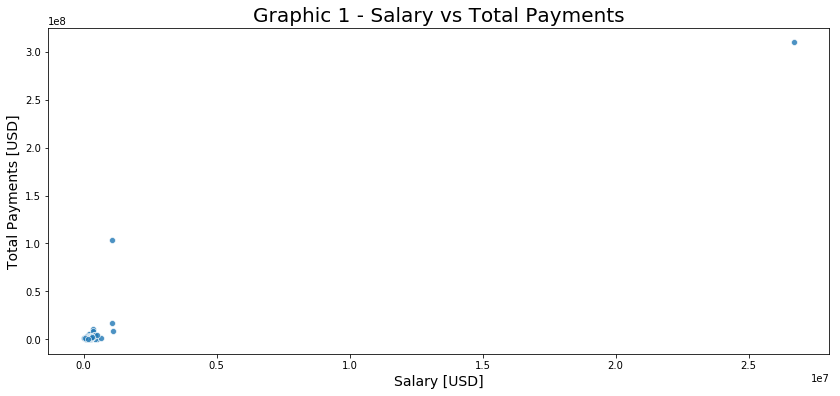

In [12]:
# Visualizing the data.

plt.figure(figsize = [14,6]);                 # Defining the figure size.
sns.scatterplot(x = df_dict.salary,           # X axis feature.
                y = df_dict.total_payments,   # Y axis feature.
                alpha = 0.8);                 # Points transparency.
plt.xlabel('Salary [USD]',                    # X axis label.
           fontsize = 14);                    
plt.ylabel('Total Payments [USD]',            # X axis label.
           fontsize = 14);
plt.title('Graphic 1 - Salary vs Total Payments', # Graphic Title.
          fontsize = 20);

Notable, there is a strange point far from the others, it is possible an outlier. Sorting the dataframe by the `salary` it is a good way to understand it.

In [13]:
# Sorting the salary, only the first 5 rows.
df_dict.query('salary != "NaN"').sort_values('salary', ascending = False)[['salary']].head()

,salary
TOTAL,26704229
SKILLING JEFFREY K,1111258
LAY KENNETH L,1072321
FREVERT MARK A,1060932
PICKERING MARK R,655037


Bear in mind, one of this observation is the `TOTAL`, which I should remove from the DataFrame because it is not an observation, it is an aggregate value.

Table 1 shows the problems to be fixed in Data Cleaning.

<br><center><strong>Table 1 - Table of Issues.</strong>

|Issue ID|Issue Type|Dimension|Method|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|Remove the `TOTAL` observation because it is an aggregate information|

</center>

I will check all in features from each employee to compute how many `NaN` are. If any the number of `NaN` reach 20 means that there is no information record for the given employee.

In [14]:
# List to store the values of NaN for each employee. 
employee_nan = []

for index in df_dict.transpose():
    employee_nan.append([index, sum(df_dict.transpose()[index] == 'NaN')])

In [15]:
# Converting the List in DataFrame.
employee_nan = pd.DataFrame(employee_nan, columns = ['Employee','# NaN']).sort_values('# NaN', ascending = False)

# Printing the first 10 rows.
employee_nan.head(10)

,Employee,# NaN
84,LOCKHART EUGENE E,20
138,WHALEY DAVID A,18
56,GRAMM WENDY L,18
127,THE TRAVEL AGENCY IN THE PARK,18
143,WROBEL BRUCE,18
53,GILLIS JOHN,17
142,WODRASKA JOHN,17
25,CLINE KENNETH W,17
133,WAKEHAM JOHN,17
114,SAVAGE FRANK,17


Without no doubt, the employee `LOCKHART EUGENE E` do not have any information.

In [16]:
# Printing the info from LOCKHART EUGENE E.
df_dict.loc[['LOCKHART EUGENE E']]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Probably the `THE TRAVEL AGENCY IN THE PARK` is not an employee, and for this reason, I also will remove it.

There are some employees, which needs some further investigation as you can see in the query below.

In [17]:
# Employees without salary and total_stock_value.
df_dict.loc[employee_nan.Employee[:10].tolist()].query('salary == "NaN"').query('total_stock_value == "NaN"')

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,119292,NaN
THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,362096,False,NaN,NaN,NaN,NaN,NaN,362096,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WAKEHAM JOHN,NaN,NaN,NaN,109298,NaN,NaN,103773,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,213071,NaN
SAVAGE FRANK,NaN,NaN,-121284,125034,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,3750,NaN


Although I have a strong reason to remove them, I can not discard it due to the lack of observations.

Table 2 shows all the issues I have found in the dataset.

<br><center><strong>Table 2 - Table of Issues.</strong>

|Issue ID|Issue Type|Dimension|Method|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|Remove the `TOTAL` observation because it is a aggregate information.|
|2|Quality|Validity|Programmatic|Remove the `LOCKHART EUGENE E` observation because it only has `NaN`.|
|3|Quality|Validity|Programmatic|Remove the `THE TRAVEL AGENCY IN THE PARK` observation because it is not an employee.|

</center>

### 2.3. Data Cleaning <a id='cleaning'></a>

Fortunately, there is only one problem pointed out in Data Assessing.

#### Issue ID 1

>**Issue:** Remove the observation `TOTAL`.

**Define**

* Remove from the `data_dict` the key `TOTAL`.

**Code**

In [18]:
# Copying the original dictionary.
data_dict_clean = data_dict.copy()

# Removing the TOTAL key.
data_dict_clean.pop('TOTAL');

**Test**

Visually I can assure the `TOTAL` removal plotting the `salary` by `total_payments`.

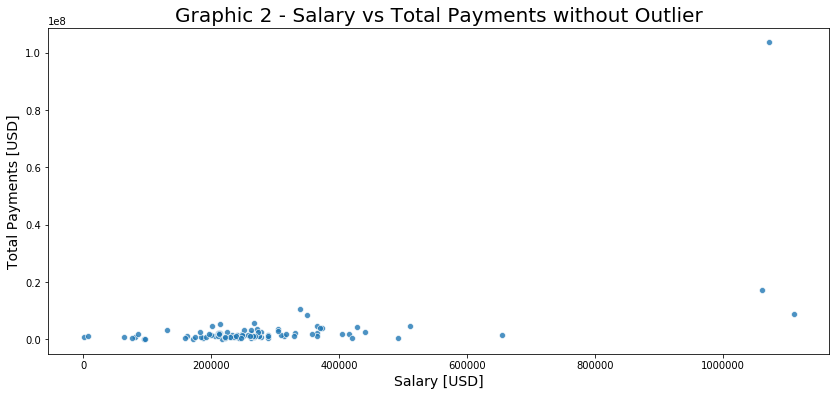

In [19]:
# Creating a dataframe to be used to plot the graphic. This is a temporaly variable.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Visualizing the data.

plt.figure(figsize = [14,6]);                 # Defining the figure size.
sns.scatterplot(x = df_clean.salary,           # X axis feature.
                y = df_clean.total_payments,   # Y axis feature.
                alpha = 0.8);                 # Points transparency.
plt.xlabel('Salary [USD]',                    # X axis label.
           fontsize = 14);                    
plt.ylabel('Total Payments [USD]',            # X axis label.
           fontsize = 14);
plt.title('Graphic 2 - Salary vs Total Payments without Outlier', # Graphic Title.
          fontsize = 20);

Programmatically I can confirm the exclusion of the `TOTAL` checking the existence in the index.

In [20]:
# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'TOTAL') # 0: removed; 1: Not removed

0

#### Issue ID 2

>**Issue:** Remove the observation `LOCKHART EUGENE E`.

**Define**

* Remove from the `data_dict` the key `LOCKHART EUGENE E`.

**Code**

In [21]:
# Removing the key LOCKHART EUGENE E.
data_dict_clean.pop('LOCKHART EUGENE E');

**Test**

In [22]:
# Temporaly variable only to justify this test.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'LOCKHART EUGENE E') # 0: removed; 1: Not removed

0

#### Issue ID 3

>**Issue:** Remove the observation `THE TRAVEL AGENCY IN THE PARK`.

**Define**

* Remove from the `data_dict` the key `THE TRAVEL AGENCY IN THE PARK`.

**Code**

In [23]:
# Removing the key THE TRAVEL AGENCY IN THE PARK.
data_dict_clean.pop('THE TRAVEL AGENCY IN THE PARK');

**Test**

In [24]:
# Temporaly variable only to justify this test.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'THE TRAVEL AGENCY IN THE PARK') # 0: removed; 1: Not removed

0

#### Checking Dataframe

I expect to have 143 observations after the cleaning process.

In [25]:
# Number of valid observations. 
print "Number of observations: ", df_clean.shape[0]

Number of observations:  143


### Task 2 - Removing Outliers <a id='task2'></a>

>**Remove outliers**

I have removed the `TOTAL` observation because it is an aggregation. The reason to keep the extreme values from `LAY KENNETH L`, `LAVORATO JOHN J`, `SKILLING JEFFREY K`, and others are due to removing I them I will lose information and its still valid points.

I also have removed `LOCKHART EUGENE E` and `THE TRAVEL AGENCY IN THE PARK` because they were not good observations and only will insert noise. The latter has only `NaN` and the former is not an employee.

### 2.4. Exporting to JSON <a id='exporting'></a>

I have decided to export the `data_dict_clean` dictionary to a JSON file to use it in the [Tableau Public][tableau_public_url].

[tableau_public_url]: https://public.tableau.com/en-us/s/

In [26]:
# Copying
df_export = df_clean.copy()

# Converting features to float. 
df_export.deferral_payments = df_clean.deferral_payments.astype(float)
df_export.deferred_income = df_clean.deferred_income.astype(float)
df_export.director_fees = df_clean.director_fees.astype(float)
df_export.exercised_stock_options = df_clean.exercised_stock_options.astype(float)
df_export.loan_advances= df_clean.loan_advances.astype(float)
df_export.long_term_incentive= df_clean.long_term_incentive.astype(float)
df_export.restricted_stock_deferred= df_clean.restricted_stock_deferred.astype(float)

# Adding an extra columns with names.
df_export['name'] = df_export.index

# Creating a dictionary.
dict_export = df_export.to_json(orient='records')

# Writing the df_dict_clean.json in the root folder.
with open('df_dict_clean.json', mode = 'w') as file:
    file.write(dict_export)

***

## 3. Exploratory Data Analysis  <a id='eda'></a>

In consonance with the Part 6 Data Visualisation of this course, I will perform the EDA using the [Tableau Public][tableau_public_url], although this is not a requirement I will push myself to use this project as an opportunity put it in practice.

[tableau_public_url]: https://public.tableau.com/en-us/s/

The file `df_dict_clean.json` exported in [2.4. Exporting to JSON](#exporting) was used as input of Tableau Public.

### 3.1. Tableau Public <a id='story'></a>

I have created a Story to explain the EDA process.

In [27]:
%%HTML
<div class='tableauPlaceholder' id='viz1548537594428' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nd&#47;nd111_project_04&#47;EDA&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nd111_project_04&#47;EDA' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nd&#47;nd111_project_04&#47;EDA&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548537594428');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.2. Feature Engineering <a id='feature_engineering'></a>

Have in mind, to avoid the [Data Leakage][data_leakage] I have used only features with low rate of `NaN`.

[data_leakage]: https://machinelearningmastery.com/data-leakage-machine-learning/

In [28]:
# Printing features with less than 40% of observation with NaN.
nan_proportion.sort_values('nan').query('nan < .40')

,nan
poi,0.00
total_payments,0.14
total_stock_value,0.14
email_address,0.24
restricted_stock,0.25
exercised_stock_options,0.30
salary,0.35
expenses,0.35
other,0.36


The problem underlying the Data Leakage is an overly optimistic and unrealistically good predictions, which probably yields a useless model.

Defining a function to create the new features.

In [29]:
# Copying the df_clean, because I need a backup.
df_eda = df_clean.copy()

In [30]:
# Defining a function to create the feature engineering.
def feature_engineering(df, ratio_name, variable_numerator, variable_denominator):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function creates the ratio/fraction between two variables and store to a dataframe.               |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe to insert the new ratio.                                                        |
    |                                                                                                  |
    |    ratio_name: Ratio's name.                                                                     |
    |                                                                                                  |
    |    variable_numerator: The feature to be divided by the numerator.                               |
    |                                                                                                  |
    |    variable_denominator: The feature to divide the denominator.                                  |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe with the ratio stored as a new column.                                          |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Temporaly variable.
    temp = []
    
    # Loop to create the ratio.
    for num,den in zip(variable_numerator, variable_denominator):
        # For each value will analise if is a NaN or not.
        if den == 0:
            temp.append(0.)
        elif (num != 'NaN') & (den != 'NaN'):
            temp.append(num/float(den))
        else:
            temp.append(0.)

    # Adding the new column.
    df[str(ratio_name)] = temp
    
    return df

### Task 3 - Creating new features <a id='task3'></a>

>**Create new feature(s)**

Based on equations (1), (2), and (3) and using the function `feature_engineering`, I have added to the dataset three new features.

Thefore, aware of Data Leakage and aiming to engineer new features. I have decided to create three new features.

* **ratio_salary_total_payments**

$$\text{ratio_salary_total_payments} = \frac{\text{salary}}{\text{total_payments}} \tag{1}$$

In [31]:
# 1. Adding the ratio_from_poi.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_salary_total_payments',
                    variable_numerator = df_eda.salary,
                    variable_denominator = df_eda.total_payments);

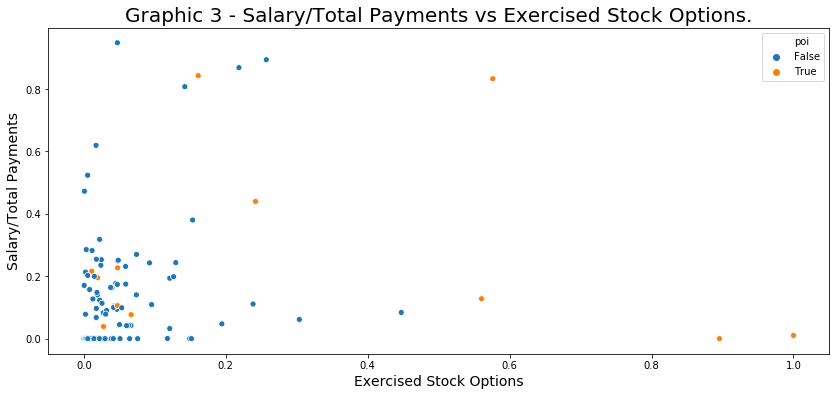

In [32]:
# Plotting a simple graphic to visualise.
plt.figure(figsize = [14, 6])
sns.scatterplot(y = 'ratio_salary_total_payments', x = df_eda.exercised_stock_options.astype(float)/df_eda.exercised_stock_options.astype(float).max(), hue = 'poi', data = df_eda)
plt.title('Graphic 3 - Salary/Total Payments vs Exercised Stock Options.', fontsize = 20)
plt.xlabel('Exercised Stock Options', fontsize = 14)
plt.ylabel('Salary/Total Payments', fontsize = 14);

* **total_income**

$$\text{total_income} = \text{total_payments} + \text{total_stock_value} \tag{2}$$

In [33]:
# Creating new feature.
df_eda['total_income'] = df_eda.total_payments.astype(float) + df_eda.total_stock_value.astype(float)

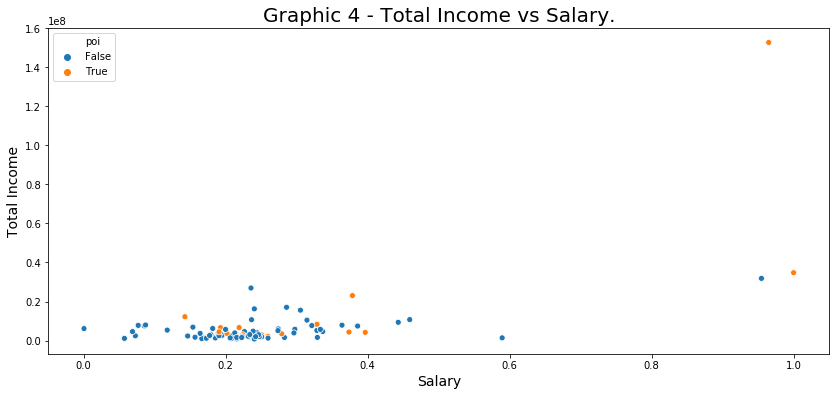

In [34]:
# Plotting a simple graphic to visualise.
plt.figure(figsize = [14, 6])
sns.scatterplot(y = 'total_income', x = df_eda.salary.astype(float)/df_eda.salary.astype(float).max(), hue = 'poi', data = df_eda)
plt.title('Graphic 4 - Total Income vs Salary.', fontsize = 20)
plt.xlabel('Salary', fontsize = 14)
plt.ylabel('Total Income', fontsize = 14);

* **ratio_stock_payments**

$$\text{ratio_stock_payments} = \frac{\text{total_stock_value}}{\text{total_payments}} \tag{3}$$

In [35]:
# 1. Adding the ratio_from_poi.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_stock_total_payments',
                    variable_numerator = df_eda.total_stock_value,
                    variable_denominator = df_eda.total_payments);

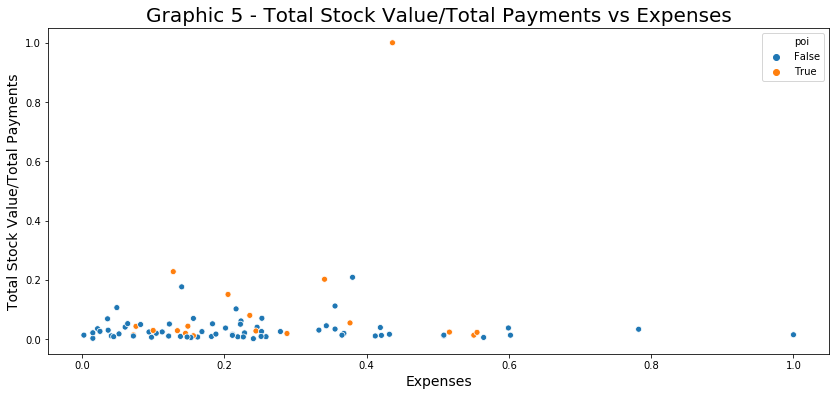

In [36]:
# Plotting a simple graphic to visualise.
plt.figure(figsize = [14, 6])
sns.scatterplot(y = df_eda.total_income/df_eda.total_income.max(), x = df_eda.expenses.astype(float)/df_eda.expenses.astype(float).max(), hue = 'poi', data = df_eda.query('ratio_stock_total_payments < 1000'))
plt.title('Graphic 5 - Total Stock Value/Total Payments vs Expenses', fontsize = 20)
plt.xlabel('Expenses', fontsize = 14)
plt.ylabel('Total Stock Value/Total Payments', fontsize = 14);

Unfortunately, I could not create any new features using data from email, mainly because these features has a lot of NaN values which could drive in Data Leakage.

Later in Feature Selection item, I will analyse each of these new features, if it is relevant to the model I will use it, if not I just need to drop out.

**Summary:** I have created 3 news features.

* ratio_salary_total_payments;
* total_income, and;
* ratio_stock_total_payments.

In [37]:
# Storing the list of engineered features.
engineered_features = ['ratio_salary_total_payments', 'total_income', 'ratio_stock_total_payments']

In [38]:
# Printing some features from df_clean. First 10 rows.
df_eda[['to_messages','from_messages','ratio_salary_total_payments', 'total_income','ratio_stock_total_payments']].head(10)

,to_messages,from_messages,ratio_salary_total_payments,total_income,ratio_stock_total_payments
ALLEN PHILLIP K,2902,2195,0.045035,6213983.0,0.385676
BADUM JAMES P,NaN,NaN,0.000000,440283.0,1.412959
BANNANTINE JAMES M,566,29,0.000521,6159684.0,5.723100
BAXTER JOHN C,NaN,NaN,0.047406,16257601.0,1.885448
BAY FRANKLIN R,NaN,NaN,0.289564,890710.0,0.076132
BAZELIDES PHILIP J,NaN,NaN,0.093960,2459777.0,1.859754
BECK SALLY W,7315,4343,0.238714,1095095.0,0.130050
BELDEN TIMOTHY N,7991,484,0.038897,6612335.0,0.201887
BELFER ROBERT,NaN,NaN,0.000000,58407.0,-0.430176
BERBERIAN DAVID,NaN,NaN,0.947950,2722090.0,10.914222


I have noticed the necessity to convert the `NaN` values to zero. The function `str_nan_to_0` will deal with the string one.

In [39]:
def str_nan_to_0(df, variable):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function converts the string NaN to zero.                                                |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe to perform the conversion.                                                      |
    |                                                                                                  |
    |    variable: The columns name to be converted.                                                   |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe with the converted columns.                                                     |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Temporaly list
    temp = []

    # When the NaN is a string.
    # Loop to fix the NaN values.
    for index in df[variable]:
        if index == 'NaN':
            temp.append(0)
        else:
            temp.append(float(index))
            
    # Updatind the columns with NaN with list with 0.
    df[variable] = temp
    
    return df

Let's convert all the `NaN` to zero.

In [40]:
# Loop to convert all columns from df_eda.
for index in df_eda:
    # These two features do not need this conversion.
    if index in ['email_address']:
        continue
    else:
        # Convert String NaN to 0.
        str_nan_to_0(df = df_eda, variable = index);
        
        # Convert float NaN to 0.
        df_eda[index] = df_eda[index].fillna(0)

In [41]:
# Saving the dataset in dictionary type.
dict_eda = df_eda.to_dict(orient = 'index')

### 3.3. `featureFormat` and `targetFeatureSplit`

These two functions are given from the project template. I have coded a function to bundle them.

In [42]:
# Following the instructions.
my_dataset = dict_eda

# This is
def wrapper_featureformatsplit(my_dataset, features_list):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function runs two scripts: featureFormat and targetFeatureSplit.                         |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    my_dataset: This is a dictionary.                                                             |
    |                                                                                                  |
    |    features_list: List of variable to be gathered from my_dataset.                               |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    labels: This is the POI feature from my_dataset.                                              |
    |                                                                                                  |
    |    features: This is an array with the features_list values.                                     |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Creating data ACCORDING to the features_list, which is input of targetFeatureSplit.
    data = featureFormat(my_dataset, features_list, sort_keys = True)

    # Using data to create labels and features.
    labels, features = targetFeatureSplit(data)
    
    # Returning the labels and features.
    return labels, features

In [43]:
# Using the defined wrapper_feat_form_split function.
labels, features = wrapper_featureformatsplit(my_dataset, original_feat)

The `labels` are the values `POI` and `non-POI`. This is what I want to predict.

In [44]:
# Printing the first labels.
labels[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

The feature is a numpy array where most of the variables from `dict_eda` are stored in a list.

$$features = [observation_1, \dots, observation_n]$$

Where:

$$observation_1 = [variable_1, variable_2, \dots, variable_{m}] $$

In [45]:
# Printing the first row of features.
features[0]

array([ 4.175000e+06,  2.869717e+06, -3.081055e+06,  0.000000e+00,
        1.729541e+06,  1.386800e+04,  2.195000e+03,  4.700000e+01,
        6.500000e+01,  0.000000e+00,  3.048050e+05,  1.520000e+02,
        1.260270e+05, -1.260270e+05,  2.019550e+05,  1.407000e+03,
        2.902000e+03,  4.484442e+06,  1.729541e+06])

### 3.3. Feature Scaling <a id='scaling'></a>

Due to the financial values varying from zero to a million dollar, these values could be dominant over the number of emails. For this reason, it is necessary to scale all the features. I will use the `MinMaxScaler` because this is the one used during the class.

In [46]:
# Function to scale.
def feat_scale(feat):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    Scale the matrix using the MinMaxScaler module from Scikit Learn.                             |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    feat: Matrix/DataFrame to be scaled.                                                          |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    feat: Scaled dataframe.                                                                       |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Importing library.
    from sklearn.preprocessing import MinMaxScaler

    # Creating the classifier to scale.
    #scaler = MinMaxScaler()
    scaler = MinMaxScaler(feature_range=(-1, 1))

    
    # Fitting the classifier.
    scaler.fit(feat)

    # Transform the data. It means: Scale the data.
    feat = scaler.transform(feat)

    # Printing the scaled data.
    return feat

In [47]:
# Scaling the features dataframe.
features = feat_scale(features)

# Printing the first row of features.
features[0]

array([ 0.04375   , -0.0896021 , -0.75839933, -1.        , -0.89929419,
       -0.87875662, -0.69445991, -0.8219697 , -0.7865353 , -1.        ,
       -0.88152409, -0.99997066, -0.68553633, -0.80730865, -0.63652905,
       -0.49030973, -0.6168724 , -0.91339415, -0.92783384])

### 3.4. Feature Selection <a id='selection'></a>

Due to the several features available, I have decided to use the `SelectKBest` from Scikit Learn package to perform the Feature Selection.

The reasons to opt to feature selection:

* Reduce the overfitting, and;
* Reduce the computational processing time due to a simpler model, it also provides an easier model to interpret.

_Read more about it in this reference:_ [Feature Selection][lasso]

[lasso]: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf

The function below has calculated the "K Best Features".

In [48]:
# General purpose function.
def feat_selection(k , feat, lab, feat_list, f_classif = 'f_classif'):
    """
    Performs the SelectionKBest from a given feat and lab.
    
    Uses the f_classif to rank/score the features.
    """
    # Importing the modules SelectKBest and f_classif
    from sklearn.feature_selection import SelectKBest, f_classif

    # Creating the classifier.
    selector = SelectKBest(f_classif, k = k)

    # Fitting the data.
    selector.fit(feat, lab)

    # Printing the scores.
    selector.scores_ 
    
    # Create a DataFrame to ease the Comparison.
    comparison = pd.DataFrame(zip(feat_list[1:],selector.scores_,selector.pvalues_), columns = ['feature','scores','p_values'])
    
    # Sorting the DataFrame by scores.
    comparison.sort_values('scores', ascending = False, inplace = True)
    
    # Multiple values to return.
    return comparison

I have used, for this example, all features available from `data_dict`.

The `wrapper_featureformatsplit` function has created labels and features.

In [49]:
# Creating the label vector and features dataframe.
lab_original, feat_original = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = original_feat)

##### Original Features

In [50]:
# Original features.
original_feat

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [51]:
# Using the function feat_selection() and show the first 5 best scored variables.
feat_sel_results = feat_selection(k = 'all', feat = feat_original, lab = lab_original, feat_list = original_feat)

# Printing.
feat_sel_results.query('p_values < 0.05')

,feature,scores,p_values
4,exercised_stock_options,24.815080,0.000002
18,total_stock_value,24.182899,0.000002
0,bonus,20.792252,0.000011
14,salary,18.289684,0.000035
2,deferred_income,11.458477,0.000922
10,long_term_incentive,9.922186,0.001994
12,restricted_stock,9.212811,0.002863
17,total_payments,8.772778,0.003589
15,shared_receipt_with_poi,8.589421,0.003946
9,loan_advances,7.184056,0.008232


I have configured the `SelectKBest` to use the `f_classif`, which means I want to calculate the ANOVA (Analysis of Variance) to rank the features.

$$\text{F value} = \frac{\text{Mean Square Between}}{\text{Mean Squared Error}}$$

Where: `F values` is the same of `scores`.

The Hypothesis test behind the scenes is:

>Is the variance between the means of two populations significantly different?

<img src="01-img/f-table.jpg">

<center><em>Figure 1 - F-distribution example.</em></center>

[Source][statisticshowto]

[statisticshowto]: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/f-statistic-value-test/

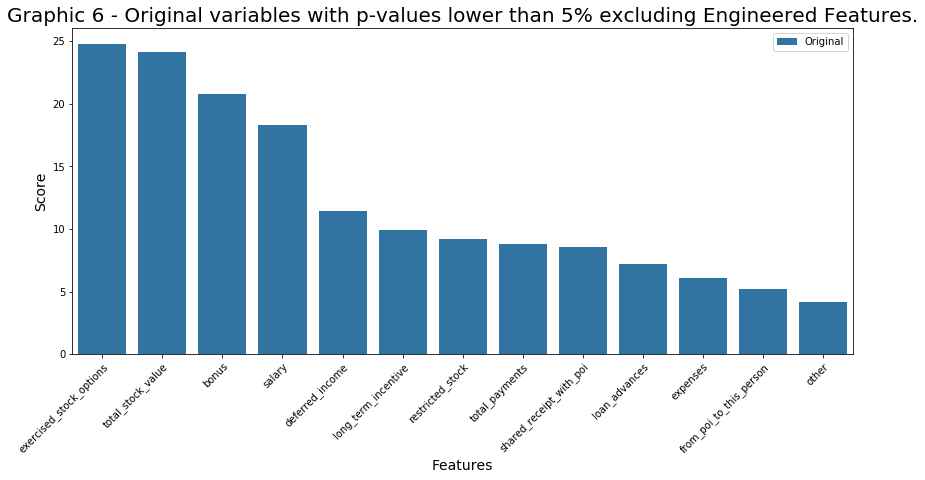

In [52]:
# Adding the hue to be comparable to the next graphic.
feat_sel_results['hue'] = 'Original'

# Ploting the graphic.
plt.figure(figsize = [14, 6])
ax = sns.barplot(x = feat_sel_results.query('p_values < 0.05').feature,
                 y = feat_sel_results.query('p_values < 0.05').scores,
                 hue = feat_sel_results.hue);
plt.title('Graphic 6 - Original variables with p-values lower than 5% excluding Engineered Features.', fontsize = 20)
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.legend();
plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
         ha="right", rotation_mode="anchor")
plt.show()

Assuming the $\alpha$ equal to 0.05, there are 13 features with p-values lower than $\alpha$, which means when adding these features its somehow changes the output (there is statistical significance).

I have adopted a strategy to remove some features with greater potential to insert Data Leakage the model.

* Features with `nan` proportion lower than 0.4, and;
* Features with `p_values` lower than $\alpha$ (0.05).

In [53]:
# Copying.
original_feature = feat_sel_results.copy()

# Defining new index names.
original_feature.index = original_feature.feature.tolist()

# Dropping the features columns.
original_feature.drop(columns = ['feature', 'hue'], inplace = True)

# Merging and filtering
original_feature = original_feature.join(nan_proportion[1:]).query('nan < .40').query('p_values < 0.05')

original_feature

,scores,p_values,nan
exercised_stock_options,24.815080,0.000002,0.30
total_stock_value,24.182899,0.000002,0.14
salary,18.289684,0.000035,0.35
restricted_stock,9.212811,0.002863,0.25
total_payments,8.772778,0.003589,0.14
expenses,6.094173,0.014758,0.35
other,4.187478,0.042582,0.36


The set of features selected using only original features are seven (excluding the `poi`):

* poi;
* exercised_stock_options;
* total_stock_value;
* salary;
* restricted_stock;
* total_payments;
* expenses, and;
* other.

##### Original plus Engineered Features

Let's use the `SelectedKBest` but now using all features (original and the engineered features).

In [54]:
# Adding to the original_feat list the engineered features.
complete_feat = original_feat + engineered_features

# Printing.
complete_feat

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'ratio_salary_total_payments',
 'total_income',
 'ratio_stock_total_payments']

Creating the labels and features using the wrapper function.

In [55]:
# Creating the label vector and features dataframe.
lab_complete, feat_complete = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = complete_feat)

Calculating the `scores`.

In [56]:
# Using the function feat_selection() and show the first 5 best scored variables.
feat_sel_results_complete = feat_selection(k = 'all', feat = feat_complete, lab = lab_complete, feat_list = complete_feat)

# Printing.
feat_sel_results_complete.query('p_values < 0.05')

,feature,scores,p_values
4,exercised_stock_options,24.815080,0.000002
18,total_stock_value,24.182899,0.000002
0,bonus,20.792252,0.000011
14,salary,18.289684,0.000035
20,total_income,17.808791,0.000044
2,deferred_income,11.458477,0.000922
10,long_term_incentive,9.922186,0.001994
12,restricted_stock,9.212811,0.002863
17,total_payments,8.772778,0.003589
15,shared_receipt_with_poi,8.589421,0.003946


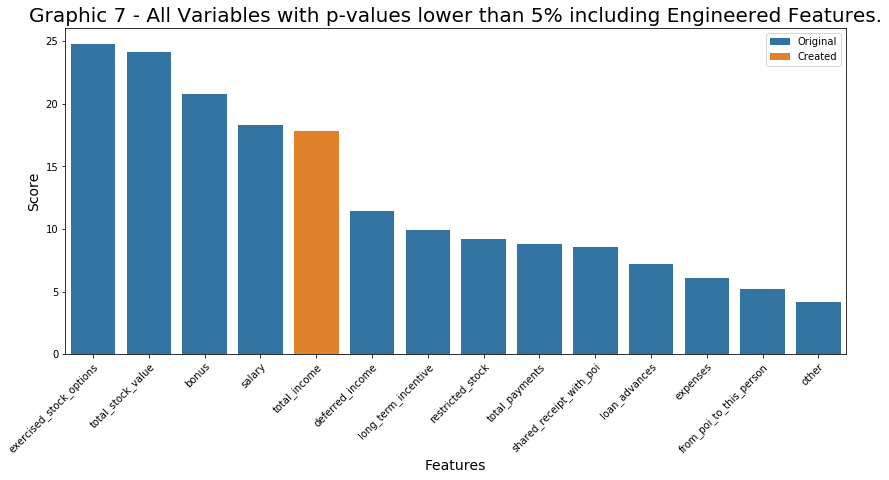

In [57]:
# Adding a new columns to use as hue in the graphic.

# Temporaly variable only to store if this is a feature engineered or not.
my_hue = []

# Loop to check it.
for feat_name in feat_sel_results_complete.feature:
    if feat_name in engineered_features:
        my_hue.append('Created')
    else:
        my_hue.append('Original')

feat_sel_results_complete['hue'] = my_hue
        
# Ploting the graphic.
plt.figure(figsize = [14, 6])
ax = sns.barplot(x = feat_sel_results_complete.query('p_values < 0.05').feature,
                 y = feat_sel_results_complete.query('p_values < 0.05').scores,
                 hue = feat_sel_results_complete.hue, dodge = False);
plt.title('Graphic 7 - All Variables with p-values lower than 5% including Engineered Features.', fontsize = 20)
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.legend();
plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
         ha="right", rotation_mode="anchor")
plt.show()

Assuming the $\alpha$ equal to 0.05, there are 14 features with p-values lower than $\alpha$. One engineered features has aggregated.

In [58]:
# Initializing a dictionary to store the NaN proportion.
nan_proportion_complete = dict()

# Loop to create the proportion of NaN per variable.
for index in df_eda.columns.tolist():
    nan_proportion_complete[index] = round(sum(df_eda[index] == 0)/float(len(df_eda[index])), 2)
    
# Converting in pandas DataFrame.
nan_proportion_complete = pd.DataFrame.from_dict(nan_proportion_complete, orient='index', columns = ['nan'])

# Copying.
complete_feature = feat_sel_results_complete.copy()

# Defining new index names.
complete_feature.index = complete_feature.feature.tolist()

# Dropping the features columns.
complete_feature.drop(columns = ['feature','hue'], inplace = True)

# Merging and filtering
complete_feature = complete_feature.join(nan_proportion_complete).query('p_values < 0.05').query('nan < 0.40')

complete_feature

,scores,p_values,nan
exercised_stock_options,24.815080,0.000002,0.29
total_stock_value,24.182899,0.000002,0.13
salary,18.289684,0.000035,0.34
total_income,17.808791,0.000044,0.25
restricted_stock,9.212811,0.002863,0.24
total_payments,8.772778,0.003589,0.14
expenses,6.094173,0.014758,0.34
other,4.187478,0.042582,0.36


The set of features selected using only original features are eight (excluding the `poi`):

* poi;
* exercised_stock_options;
* total_stock_value;
* salary;
* total_income (engineered features);
* restricted_stock;
* total_payments;
* expenses, and;
* other.


I have created two lists of features:

* `features_significant_original`;
    * Only original features with significance lower than 0.05 and `nan` lower than 0.40;
* `features_significant_complete`;
    * Original features plus engineered features with significance lower than 0.05 and `nan` lower than 0.40.

In [59]:
# Saving the lists of features.
features_significant_original = ['poi'] + original_feature.index.tolist()
features_significant_complete = ['poi'] + complete_feature.index.tolist()

### Task 1 - Feature List <a id='task1'></a>

>**Select what features you'll use.**

In [60]:
# Definition of feature_list
feature_list = features_significant_complete

# Printing.
feature_list

['poi',
 'exercised_stock_options',
 'total_stock_value',
 'salary',
 'total_income',
 'restricted_stock',
 'total_payments',
 'expenses',
 'other']

Let's plot the correlation map for the `features_significant_original`.

In [61]:
# Creating a function to calculate the correlation between variables.
def calc_correlation(df, feat_list):
    """
    Calculates the correlation between variables from df DataFrame which is
    in the feat_list.
    """
    # Temporaly variable. List to store the columns values.
    temp = []

    # Loop to subset the dataframe.
    for index in feat_list:
        temp.append(df[index])

    # Correlation Calculation.
    return pd.DataFrame(np.corrcoef(temp), columns = feat_list, index = feat_list)

In [62]:
# Creating a function to plot a heatmap.
def heatmap(df_corr, title):
    """
    Based on the df_corr (it is a list) creates a "heatmap" of correlations.
    """
    plt.figure(figsize = [8,6])                  # Graph/Figure size
    ax = sns.heatmap(df_corr, linewidth=0.5)     # Heatmap
    ax.set_xticklabels(df_corr.index)            # X ticks labels
    ax.set_yticklabels(df_corr.columns)          # Y ticks labels
    plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
             ha="right", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=0,   # 0 degree labels on Y axis
             ha="right", rotation_mode="anchor")
    plt.title(title,
              fontsize = 20);
    plt.show()

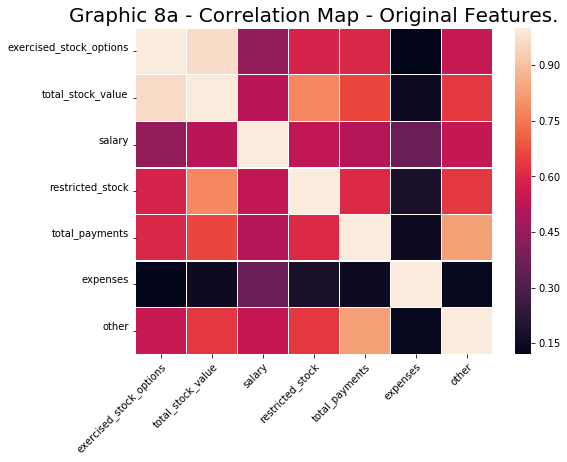

In [63]:
# Priting the heatmap.
heatmap(calc_correlation(df_eda, feat_list = features_significant_original[1:]),
        title = "Graphic 8a - Correlation Map - Original Features.")

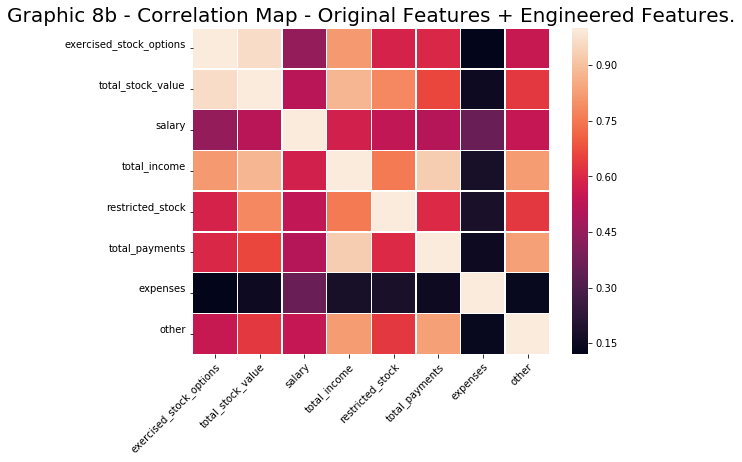

In [64]:
# Priting the heatmap.
heatmap(calc_correlation(df_eda, feat_list = feature_list[1:]),
        title = "Graphic 8b - Correlation Map - Original Features + Engineered Features.")

As you can see, there are variables with high correlation such as:

* `exercised_stock_options` and `total_stock_value`, and;
* `expenses`which do not have relationship with any variable.

#### 3.4.1. Evaluating the Classifiers <a id='classifier_evaluation'></a>

Let's evaluate the lists of features `feature_list` and `features_significant_original` using standards configuration of several classifiers.

The reason to do it is to make a sensible analysis of features selected to the final model.

Have in mind, I have employed to this task the simplest way to divide a dataset into training and testing applying the `train_test_split` module from Scikit Learn. In future chapters, I will use more sophisticated methods to split the dataset according to the complex of the task and necessity.

I have created a function to bundle code lines because it could be repetitive.

In [65]:
# Function to create the dataset of features according to the features selected.
def create_traintest(my_data_dict, feat_list):
    """
    This function apply the function wrapper_featureformatsplit to create the
    labels vector and features matrix, then scale it and finally create the training
    and testing dataframes.
    """
    from sklearn.model_selection import train_test_split
    
    # Create the Labels vector and Features Matrix.
    lab, feat = wrapper_featureformatsplit(my_dataset = my_data_dict, features_list = feat_list)
    
    # Scaling the Feature Matrix due to the extreme values.
    feat = feat_scale(feat)
    
    # Spliting the data into training and testing.
    features_train, features_test, labels_train, labels_test = train_test_split(feat, lab, test_size=0.3, random_state=42)
    
    # Returning a list.
    return features_train, features_test, labels_train, labels_test

Unfortunately, I have not tuned/calibrated the classifier so I will use the regular/default values as a starter. This function is a straightforward way to evaluate each set of features.

In [66]:
def select_fit_evaluate(classifier, train_test_data):
    """
    This function calculates the accuracy, recall, and precision given the training, testing
    dataset, and classifier.
    """
    # Unzipping the list from the create_traintest funciton.
    feat_train, feat_test, lab_train, lab_test = train_test_data
    
    # List of Classifier and parameters.
    list_class = {'ada':('ada', AdaBoostClassifier(n_estimators=100)),
                  'svc':('svc', SVC(gamma='auto')),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier(n_neighbors=5)),
                  'random':('rand', RandomForestClassifier(n_estimators = 100))}
    
    # Creating the Pipeline.
    pipeline_ = Pipeline([list_class[classifier]])
    
    # Fitting.
    pipeline_.fit(feat_train,lab_train)
    
    # Predicting.
    pred_t = pipeline_.predict(np.array(feat_test))
        
    # Calculating the accuracy.
    acc = accuracy_score(lab_test, pred_t)
    
    # Calculating the recall. It is an array of (recall non-POI, recall POI)
    recall = recall_score(y_true = lab_test, y_pred = pred_t, average = None)

    # Calculating the precision. It is an array of (precision non-POI, precision POI)
    precision = precision_score(y_true = lab_test, y_pred = pred_t, average = None)
    
    # Return the accuracy.
    return acc, recall.tolist(), precision.tolist()

So far I have created 2 lists of features.

* `features_significant_original`;
* `feature_list`.

However, I have used the opportunity to evaluate more two set of features:

* `original_feat`: All 20 features from the original source;
* `complete_feat`: All 20 features from the original source plus 3 Engineered Features;

In [67]:
# Considering the 'POI'.
print "features_significant_original", len(features_significant_original)
print "feature_list", len(feature_list)
print "original_feat", len(original_feat)
print "complete_feat", len(complete_feat)

features_significant_original 8
feature_list 9
original_feat 20
complete_feat 23


In [68]:
# All list I have created so far.
all_list = [original_feat, complete_feat, features_significant_original, feature_list]

The follow function will create a table of comparison of a given list of features.

In [69]:
# Creates a table of comparison.
def comparison_metrics(classifier, list_of_list):
    """
    Creates a dataframe with the values of accuracy, recall, and precision for all
    set of features in list_of_list.
    """
    import warnings
    warnings.filterwarnings("ignore")
    
    # Compute the time consuming.
    import time
    
    # Tracking the time.
    t_start = time.time()
    
    # Temporaly variables to store the values of accuracy, recall and precision.
    acc = [] # Accuracy
    recall = [] # recall from poi and non-poi
    precision = [] # precision from poi and non-poi

    # Loop to calculate for each list of features the accuracy, precision and recall.
    for index in list_of_list:
        # Unloading the values calculated by select_fit_evaluate function. 
        i_acc,\
        i_recall,\
        i_precision = select_fit_evaluate(classifier = classifier,
                                          train_test_data = create_traintest(my_dataset,
                                                                             feat_list = index))
        
        # Appending the values in the list.
        acc.append(i_acc)
        recall.append(i_recall)
        precision.append(i_precision)

    # Converting to DataFrame.
    acc = pd.DataFrame(acc, columns = ['accuracy'])
    recall = pd.DataFrame(recall, columns = ['recall_non_poi','recal_poi'])
    precision = pd.DataFrame(precision, columns = ['precision_non_poi','precision_poi'])

    # Merging.
    comparison = acc.join(recall).join(precision)

    # Renaming the rows.
    comparison.index = ['original_feat','complete_feat','features_significant_original','feature_list']

    # Tracking the time
    t_end = time.time()
    
    print "Duration:", round((t_end - t_start)/60, 4), "minutes"
    
    # Printing the results.
    return comparison

Let's compare each set of features using different classifiers.

### Task 4 - Try a varity of classifiers <a id='task4'></a>

>**Try a varity of classifiers**

I have used 4 different set of features for each classifier.

Bear in mind, the comparison takes into account the recall and precision for both labels (0 and 1). 

In [70]:
# Naïve Bayes.
comparison_metrics(classifier = 'gauss', list_of_list = all_list)

Duration: 0.0007 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.395349,0.342105,0.800000,0.928571,0.137931
complete_feat,0.581395,0.552632,0.800000,0.954545,0.190476
features_significant_original,0.860465,0.972222,0.285714,0.875000,0.666667
feature_list,0.860465,0.972222,0.285714,0.875000,0.666667


In [71]:
# Random Forest.
comparison_metrics(classifier = 'random', list_of_list = all_list)

Duration: 0.0271 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.906977,1.0,0.2,0.904762,1.0
complete_feat,0.906977,1.0,0.2,0.904762,1.0
features_significant_original,0.837209,1.0,0.0,0.837209,0.0
feature_list,0.837209,1.0,0.0,0.837209,0.0


In [72]:
# AdaBoost.
comparison_metrics(classifier = 'ada', list_of_list = all_list)

Duration: 0.0249 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.813953,0.894737,0.200000,0.894737,0.2
complete_feat,0.813953,0.894737,0.200000,0.894737,0.2
features_significant_original,0.837209,0.972222,0.142857,0.853659,0.5
feature_list,0.837209,1.000000,0.000000,0.837209,0.0


In [73]:
# Decision Tree.
comparison_metrics(classifier = 'tree', list_of_list = all_list)

Duration: 0.0009 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.837209,0.921053,0.200000,0.897436,0.25
complete_feat,0.837209,0.921053,0.200000,0.897436,0.25
features_significant_original,0.813953,0.916667,0.285714,0.868421,0.40
feature_list,0.837209,0.916667,0.428571,0.891892,0.50


In [74]:
# K Nearest Neighbor.
comparison_metrics(classifier = 'knn', list_of_list = all_list)

Duration: 0.0007 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.837209,0.947368,0.0,0.878049,0.0
complete_feat,0.790698,0.894737,0.0,0.871795,0.0
features_significant_original,0.837209,1.000000,0.0,0.837209,0.0
feature_list,0.837209,1.000000,0.0,0.837209,0.0


In [75]:
# Support Vector Machine.
comparison_metrics(classifier = 'svc', list_of_list = all_list)

Duration: 0.0005 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.883721,1.0,0.0,0.883721,0.0
complete_feat,0.883721,1.0,0.0,0.883721,0.0
features_significant_original,0.837209,1.0,0.0,0.837209,0.0
feature_list,0.837209,1.0,0.0,0.837209,0.0


So far no one of the simulations has precision and recall greater than 0.3.

For this reason, I have decided to perform the parameters tuning.

### 3.5. Dimension Reduction <a id='pca'></a>

Due to the few features of this model (8 in `features_significant_original` and 9 in `feature_list`), I will not use the PCA because I do not see any advantages to reduce the number of features, the trade-off between computational performance and information-loss it is in favour to keep the features as is.

***

# 4. Predicting <a id='predicting'></a>

So far I have used non-tuned classifiers, the next step of this project is to adjust the parameters to find a better solution. Remember, the main objective of this project is to create a model capable to classify an employee (in POI or non-POI) based on past experiences (database).

##### Cross-validation

For this step, I have used the [StratifiedShuffleSplit][sk_learn_sss] cross-validation model to aid in the process of model selection. It is necessary to evaluate the model using an independent dataset (the so-called test dataset) to avoid the overfitting the model. The `StratifiedShuffleSplit` function runs several times (`n_split`) the same model using the same parameters but varying the datasets of training and test (shuffling the observations). All this preserving the proportion of each label.

[sk_learn_sss]: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

## 4.1. Tuning Parameters <a id='tuning'></a>

In this chapter I have performed the parameters' tuning from several classifiers, due to the so many different parameters combination and the difficult to create a function to automize it, I have done it manually.

The general setup for each calibration:

* Training and Test dataset based on `feature_list`;
* The metric to evaluate (scoring) each simulation elect was the 'f1';
* Cross-validation using `StratifiedShuffleSplit` and `n_split` equal to 20, and;
* Random State = 42.

Let's create a dedicated dataset for tuning.

In [76]:
# Creating Datasets to be used in tuning.
lab_tuning, feat_tuning = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = feature_list)

# Scaling.
feat_tuning = feat_scale(feat_tuning)

To avoid repetition in the report, I have created a function to bundle some code lines. The output of this function is the classifier, the reason to return a classifier is due to the flexibility provided using it. I could use all methods of `GridSearchCV`, for instance:

* `.best_estimator_`;
* `.cv_results_`, and etc.

In [77]:
# Function to encapsulate some code lines.
def tuning(parameters, classifier, feat = feat_tuning, lab = lab_tuning, scoring = 'f1', n_splits = 20, random_state = None):
    """
    This function ensemble the GridSearchCV and Pipeline to run several types of classifiers
    and several values of parameters.
    """
    
    import warnings
    warnings.filterwarnings("ignore")
    
    
    # Dictionary of Classifiers and Constructors.
    list_class = {'ada':('ada', AdaBoostClassifier()),
                  'svc':('svc', SVC()),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier()),
                  'rand':('rand', RandomForestClassifier())}
    
    # Creating the Pipeline.
    pipeline = Pipeline([list_class[classifier]])

    # Creating the GridSearch Object.
    clf = GridSearchCV(estimator = pipeline,                         # Pipeline
                       param_grid = parameters,                      # Parameters to be tested.
                       cv = StratifiedShuffleSplit(n_splits = n_splits,    # Number of splits.
                                                   test_size = 0.25, # Test Dataset size
                                                   random_state = random_state), # Set the random seed.
                            scoring = scoring)                       # Metric to evaluate.
    
    # Fitting.
    clf.fit(feat, lab)
    
    # Printing recall. It is the MEAN of 20 instances/n_splits.
    print "F1:", round(100 * clf.cv_results_['mean_test_score'].max(), 2), "%"
    
    # Creating a vector to select the best value.
    select_best = clf.cv_results_['mean_test_score'] == clf.cv_results_['mean_test_score'].max()
    
    print "F1 Standard Deviation:", round( 100 * clf.cv_results_['std_test_score'][select_best][0], 2), "%"
    
    # Return the classifier.
    return clf

Sadly, I have not found an easy way to implement a heuristic to guide me to find good values of parameters (I got traumatized coding a Genetic Algorithm, for this reason, I have performed it manually). Thus, I adopted these concepts to drive through the optimized parameters.

- Best first search;
- Divide-and-conquer.

#### Best First Search

Generally, classifiers have a lot of parameters. I have defined the following strategy:

* Start by the Scalar parameters;
    * Integer;
    * Floats;
* Categorical parameters.

I will take the most promising node for each tree level, it means, I will find the optimized value for parameter_1 and keep all the other parameters constant then I move to the next parameter and repeat the same concept.

[Source][best_first_search]

[best_first_search]: https://en.wikipedia.org/wiki/Best-first_search

#### Divide-and-conquer

As a first step, I take 2 reasonable values (using intuition or the default values from the Scikit Learn) for each level of the tree (in this case the same of a parameter) and calculate the mean, which I will use as a parameter candidate.

$$\text{paramater}_1 = [value_1, mean, value_2]$$

After calculating the evaluation metric using these three values, it is possible to determine in which of the two parts the optimized value is much closed. Suppose the `value_1` is the one with a better evaluation metric.

$$\text{paramater}_1 = [value_1, \frac{value_1 + mean}{2},mean]$$

So the cycle restarts.

Have in mind, there are other situations, and this is just a brief explanation of how I have conducted the calibration.

[Source][divide_and_conquer]

[divide_and_conquer]: https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm

#### Caveat

There are several caveats in this approach one of them is I could fall in a local maximum (mostly because I do not use backtracking).

### 4.1.1. Support Vector Machine (SVM) Tuning

Optimized parameters:

* kernel: rbf;
* C: 1000;
* degree: 1;
* gamma: 4.3, and;
* F1 (mean): 18.72%.

In [78]:
# Defining possible parameters.
parameters = {'svc__kernel':['rbf','linear'],
              'svc__C':[1000.,1010, 990],
              'svc__degree':[1,2],
              'svc__gamma':[4.2, 4.3, 4.1]}

# Creating the classifier using the function tuning.
clf = tuning(parameters, 'svc', feat_tuning, lab_tuning, 'f1', random_state = 42)

# Printing the optimized estimator.
clf.best_estimator_

F1: 18.72 %
F1 Standard Deviation: 17.59 %


Pipeline(memory=None,
     steps=[('svc', SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=4.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Creating a classifier with optimized parameters.

In [79]:
# Creating a classifier with the optimized parameters.
clf_svm = SVC(kernel = 'rbf', C = 1000, degree = 1, gamma = 4.3)

### 4.1.2. Naïve Bayes Tuning

The Naïve Bayes does not have any parameter to calibrate.

* F1 (mean): 24.00%.

In [80]:
# import warnings
# warnings.filterwarnings("ignore")

# Defining parameters.
parameters = {}

# Creating classifier and training. Bear in mind, the random state.
clf = tuning(parameters, 'gauss', feat_tuning, lab_tuning, 'f1', random_state = 42)

# Printing optimized estimators.
clf.best_estimator_

F1: 24.0 %
F1 Standard Deviation: 17.12 %


Pipeline(memory=None, steps=[('gauss', GaussianNB(priors=None))])

Creating a classifier with optimized parameters.

In [81]:
# Creating a classifier with the optimized parameters.
clf_gauss = GaussianNB()

### 4.1.3. AdaBoost Tuning

Optimized parameters:

* n_estimators: 67;
* learning_rate: 1, and;
* F1 (mean): 25.24%.

In [82]:
# Defining parameters.
parameters = {'ada__n_estimators':[68, 67, 66],
              'ada__learning_rate':[0.9, 1.0, 1.1]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'ada', feat_tuning, lab_tuning, 'f1', random_state = 42)

# Printing optimized estimators.
clf.best_estimator_

F1: 25.24 %
F1 Standard Deviation: 20.93 %


Pipeline(memory=None,
     steps=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=67, random_state=None))])

Creating a classifier with optimized parameters.

In [83]:
# Creating a classifier with the optimized parameters.
clf_ada = AdaBoostClassifier(learning_rate = 1.0, n_estimators = 67)

### 4.1.4. K-Nearest Neighbors Tuning

Optimized parameters:

* n_neighbors: 1;
* algorithm: auto;
* leaf_size: 1;
* p: 2, and;
* F1 (mean): 24.43%.

In [84]:
# Defining parameters.
parameters = {'knn__n_neighbors': [1, 2,3],
              'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'knn__leaf_size':[1, 2,3],
              'knn__p':[1, 2,3]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'knn', feat_tuning, lab_tuning, 'f1', random_state = 42)

# Printing optimized estimators.
clf.best_estimator_

F1: 24.43 %
F1 Standard Deviation: 21.79 %


Pipeline(memory=None,
     steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])

Creating a classifier with optimized parameters.

In [85]:
# Creating a classifier with the optimized parameters.
clf_knn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', leaf_size = 1, p = 2)

### 4.1.5. Decision Trees Tuning

Optimized parameters:

* class_weight: 'balanced';
* criterion: 'entropy';
* max_leaf_nodes: 3;
* min_samples_leaf: 1;
* min_samples_split: 2;
* splitter: 'best';
* max_depth: 5, and;
* Recall (mean): 75%.

In [86]:
# Defining parameters.
parameters = {'tree__class_weight':[None,'balanced'],
              'tree__criterion': ['gini', 'entropy'],
              'tree__max_depth': [5, 6 , 4],
              'tree__splitter':['best', 'random'],
              'tree__max_leaf_nodes':[None, 2, 3, 4],
              'tree__min_samples_leaf':[1, 2, 3],
              'tree__min_samples_split': [2, 3, 4]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'tree', feat_tuning, lab_tuning, 'f1', random_state = 42)

# Printing optimized estimators.
clf.best_estimator_

F1: 49.71 %
F1 Standard Deviation: 11.58 %


Pipeline(memory=None,
     steps=[('tree', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])

Creating a classifier with optimized parameters.

In [87]:
# Creating a classifier with the optimized parameters.
clf_tree = tree.DecisionTreeClassifier(splitter = 'best',
                                       criterion = 'gini',
                                       class_weight = 'balanced',
                                       min_samples_leaf = 1,
                                       min_samples_split = 2,
                                       max_depth = 5,
                                       max_leaf_nodes = 4)

### 4.1.6. Random Forest Tuning

Optimized parameters:

* class_weight: 'balanced';
* criterion: 'gini';
* max_leaf_nodes: 2;
* min_samples_leaf: 2;
* min_samples_split: 3;
* max_depth: 5, and;
* Recall (mean): 61.25%.

In [88]:
# Ensure the reproducibility.
np.random.seed(42)

# Defining parameters.
parameters = {'rand__class_weight':['balanced'],
              'rand__criterion': ['gini', 'entropy'],
              'rand__n_estimators':[5, 4, 3],
              'rand__max_depth': [5, 3, 4],
              'rand__max_leaf_nodes':[3, 2],
              'rand__min_samples_leaf':[3, 2, 1],
              'rand__min_samples_split':[3, 2]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'rand', feat_tuning, lab_tuning, 'f1')

# Printing optimized estimators.
clf.best_estimator_

F1: 46.58 %
F1 Standard Deviation: 12.46 %


Pipeline(memory=None,
     steps=[('rand', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

Creating a classifier with optimized parameters.

In [89]:
# Creating a classifier with the optimized parameters.
clf_rand = RandomForestClassifier(n_estimators = 5,
                                  class_weight = 'balanced',
                                  criterion = 'gini', 
                                  max_depth = 5, 
                                  max_leaf_nodes = 3, 
                                  min_samples_leaf = 3, 
                                  min_samples_split = 3)

### 4.1.7. Optimized Parameters Output Comparison

Table 5 compares the F1 (mean of 20 stratified shuffle split F1 metric) from the process of tuning.

<strong><center>Table 5 - F1 Performance of Tuning Process.</center></strong>

|Classifier|F1 \[%\]|Standard Deviation \[%\]|
|:-:|:-:|:-:|
|SVM|18.72|17.59|
|Naïve Bayes|24.00|17.12|
|AdaBoost|25.24|20.93|
|K-Nearest Neighbor|24.43|21.79|
|Decision Trees|49.71|11.58|
|Random Forest|39.54|13.02|

Decision Tree and Random Forest has better metrics and seems to have a more stable model due to the lower standard deviation. Equation (4) shows how to calculate the F1 score.

$$\text{F1} = 2 \cdot \frac{precision \cdot recall}{precision + recall} \tag{4}$$

Have in mind, to maximize F1 it is necessary to have balanced values of Recall and Precision.

Due to the very poor performance shown in the tuning process, I have discarded the Support Vector Machine (SVM) classifier.

## 4.2. Evaluating Classifiers after Tuning  <a id='evaluating_classifiers'></a>

Here, I have used the `test_classifier` function provided in the `tester.py` file.

Although all classifiers have been trained using the `feature_list`. I have also evaluated the set of features `features_significant_original` to make a simple comparison, both sets of features are quite equal, the difference stay in one engineered features in `feature_list`.

### 4.2.1. Naïve Bayes Evaluation

In [90]:
# Testing the classifier.
tester.test_classifier(clf = clf_gauss,
                       dataset = my_dataset,
                       feature_list = features_significant_original)

GaussianNB(priors=None)
	Accuracy: 0.84927	Precision: 0.37342	Recall: 0.19250	F1: 0.25404	F2: 0.21315
	Total predictions: 15000	True positives:  385	False positives:  646	False negatives: 1615	True negatives: 12354



In [91]:
# Testing the classifier.
tester.test_classifier(clf = clf_gauss,
                       dataset = my_dataset,
                       feature_list = feature_list)

GaussianNB(priors=None)
	Accuracy: 0.85313	Precision: 0.40343	Recall: 0.21200	F1: 0.27794	F2: 0.23423
	Total predictions: 15000	True positives:  424	False positives:  627	False negatives: 1576	True negatives: 12373



##### Conclusion

Discard this classifier because it did not reach a minimum of 30% for recall. The F1 metric obtained from the tester is very close to the mean observed in Table 5.

### 4.2.2. AdaBoost Evaluation

In [92]:
# Testing the classifier.
tester.test_classifier(clf = clf_ada,
                       dataset = my_dataset,
                       feature_list = features_significant_original)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=67, random_state=None)
	Accuracy: 0.84407	Precision: 0.38986	Recall: 0.30000	F1: 0.33908	F2: 0.31450
	Total predictions: 15000	True positives:  600	False positives:  939	False negatives: 1400	True negatives: 12061



In [93]:
# Testing the classifier.
tester.test_classifier(clf = clf_ada,
                       dataset = my_dataset,
                       feature_list = feature_list)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=67, random_state=None)
	Accuracy: 0.85273	Precision: 0.43111	Recall: 0.32700	F1: 0.37191	F2: 0.34360
	Total predictions: 15000	True positives:  654	False positives:  863	False negatives: 1346	True negatives: 12137



##### Conclusion

To the set of features of `feature_list`, both metrics have outperformed the threshold of 30%.

This classifier should be picked as a candidate.

### 4.2.3. K-Nearest Neighbors Evaluation

In [94]:
# Testing the classifier.
tester.test_classifier(clf = clf_knn,
                       dataset = my_dataset,
                       feature_list = features_significant_original)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
	Accuracy: 0.81607	Precision: 0.24950	Recall: 0.18900	F1: 0.21508	F2: 0.19863
	Total predictions: 15000	True positives:  378	False positives: 1137	False negatives: 1622	True negatives: 11863



In [95]:
# Testing the classifier.
tester.test_classifier(clf = clf_knn,
                       dataset = my_dataset,
                       feature_list = feature_list)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
	Accuracy: 0.80993	Precision: 0.26216	Recall: 0.23450	F1: 0.24756	F2: 0.23955
	Total predictions: 15000	True positives:  469	False positives: 1320	False negatives: 1531	True negatives: 11680



##### Conclusion

I have discarded this classifier because the recall metric did not reach 30%.

### 4.2.4. Decision Trees Evaluation

In [96]:
# Testing the classifier.
tester.test_classifier(clf = clf_tree,
                       dataset = my_dataset,
                       feature_list = features_significant_original)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.76160	Precision: 0.31793	Recall: 0.68800	F1: 0.43489	F2: 0.55808
	Total predictions: 15000	True positives: 1376	False positives: 2952	False negatives:  624	True negatives: 10048



In [97]:
# Testing the classifier.
tester.test_classifier(clf = clf_tree,
                       dataset = my_dataset,
                       feature_list = feature_list)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80673	Precision: 0.39290	Recall: 0.82450	F1: 0.53219	F2: 0.67599
	Total predictions: 15000	True positives: 1649	False positives: 2548	False negatives:  351	True negatives: 10452



##### Conclusion

To the set of features of `feature_list` and `features_significant_original`, both metrics have outperformed the threshold of 30%.

This classifier should be picked as a candidate.

### 4.2.5. Random Forest Evaluation

In [98]:
# Testing the classifier.
tester.test_classifier(clf = clf_rand,
                       dataset = my_dataset,
                       feature_list = features_significant_original)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.76067	Precision: 0.29955	Recall: 0.59400	F1: 0.39826	F2: 0.49641
	Total predictions: 15000	True positives: 1188	False positives: 2778	False negatives:  812	True negatives: 10222



In [99]:
# Testing the classifier.
tester.test_classifier(clf = clf_rand,
                       dataset = my_dataset,
                       feature_list = feature_list)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.76360	Precision: 0.31220	Recall: 0.64250	F1: 0.42021	F2: 0.53029
	Total predictions: 15000	True positives: 1285	False positives: 2831	False negatives:  715	True negatives: 10169



##### Conclusion

To the set of features of `feature_list`, both metrics have outperformed the threshold of 30%.

This classifier should be picked as a candidate.

### 4.2.6. Final Classifier

Table 6 shows the output from `tester.py`.

<strong><center>Table 6 - Accuracy, Precision, and Recall from `tester.py` using the `feature_list`.</center></strong>

|Classifier|Accuracy|Precision|Recall|F1|
|:-:|:-:|:-:|:-:|:-:|
|Naïve Bayes|0.84927|0.37342|0.19250|0.25404|
|AdaBoost|0.85313|0.43327|0.32950|0.37433|
|K-Nearest Neighbor|0.80993|0.26216|0.23450|0.24756|
|Decision Trees|0.80647|0.39237|0.82300|0.53140|
|Random Forest|0.76500|0.31307|0.63850|0.42013|

The selected classifier is the `Decision Trees`.

### Task 5 -  Tune your classifier <a id='task5'></a>

>**Tune your classifier to achieve better than .3 precision and recall using our testing script.**

The best classifier according to the chosen `list_features` is the **Decision Trees**.

```
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80707	Precision: 0.39342	Recall: 0.82500	F1: 0.53277	F2: 0.67656
	Total predictions: 15000	True positives: 1650	False positives: 2544	False negatives:  350	True negatives: 10456
```

In [100]:
# Select Classifier.
clf_tree

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Task 6 - Dump your classifier, dataset, and `features_list` <a id='task6'></a>

>**Dump your classifier, dataset, and features_list so anyone can check your results.**

In [101]:
# Task 5 - Dumping classifier, my_dataset, and the list of features.
dump_classifier_and_data(clf = clf_tree, dataset = my_dataset, feature_list = feature_list)

***

# 5. Conclusions <a id='conclusions'></a>


The aim of this project is to create a Machine Learning Classification Algorithm using a "raw" database (of Enron).

Along the report, I have tested several classifiers (Support Vector Machine, Naïve Bayes, AdaBoost, K-Nearest Neighbors, Decision Trees, and Random Forest) and I have ended-up selecting the **Decision Trees**, which have yielded:

* Precision: 0.39342;
* Recall: 0.82500, and;
* Accuracy: 0.80707.

The `feature_list` has the following features:

* poi;
* exercised_stock_options;
* total_stock_value;
* salary;
* total_income (this one a engineered feature);
* restricted_stock;
* total_payments;
* expenses, and;
* other.

# 6. Questions <a id='questions'></a>


>## Question 1
>Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

The project is about the ENRON Dataset, but only using a small part of the Dataset tailored to this project which has 146 observations and 21 features (divided into an email and financial features). ENRON was a company of energy based in Houston, USA, this company crashed after the fraud committed by the directors became public.

The main goal of this project is the proper understanding of all process/steps of a Machine Learning model and how to apply it in a real case of prediction. I have divided this Machine Learning Project into:

##### Gathering data

Downloading the data forking/cloning it from the Github.

##### Assessing and Cleaning data

Assessing the data to identify any problems in the 146 observations overall 21 features. I have found some problems like:

* Aggregated observation such as TOTAL;
* Non-standard employee such as THE TRAVEL AGENCY IN THE PARK, and;
* NaN values.

In this step, to fix these problems I have removed the TOTAL and THE TRAVEL AGENCY IN THE PARK. In the case of NaN, I have filled it with 0.

##### Selecting features

Due to a large number of features, I have used the `SelectKBest` module to filter the features with statistical significance, later I have used a Genetic Algorithm to find which set of features has the most promising/up-and-coming metrics.

##### Selecting classifier

This step is crucial and for this reason, I have tested several kinds of classifiers/algorithms:

* Support Vector Machine;
* AdaBoost;
* K Neighbor; 
* Decision Tree;
* Naïve Bayes, and;
* Random Forest.

I have created a function to bundle all these classifiers with its parameters, for this reason, I have used a "generic" approach to analyze each classifier.

The main aspect which has driven the selection decision was the balance between recall and precision, but with a preference model with a higher level of recall. Model with high recall tends to miss less the POI, this is crucial because there are few of them. In other words, I want to avoid false negatives.

##### Tuning classifier

Calibrating the values of each parameter from the classifier. This task could be done easily using `GridSearchCV`.

##### Evaluating results

Try to evaluate the stability of the results running several tests and assessing the metrics. This is a way to evaluate the capacity of the generalization of the model.

##### Drawing conclusion.

Finally, after all, the steps above mentioned the classifiers select is the **Decision Trees** with the following metrics:

* Precision: 0.39342;
* Recall: 0.82500;
* Accuracy: 0.80707, and;
* Number of predictions: 15000.

These metrics met with the threshold established by the project requirements.

As a result of it, the model based on ENRON dataset will be able to predict with a good margin of confidence, if an employee from ENRON is a Person of Interest (POI) or not.

>## Question 2 
>What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]


Initially, I have used the `SelectKBest` as the first step of my selection features process, as a result of this step I have selected 13 features with statistical significance. In the second step I have compared these 13 features with the presence of `NaN`, my strategy was to remove any feature with more than 40% of `NaN`. Finally, analysing only the original features (without any engineered feature) I have ended up with 7 features.

##### Using only Original Features

In [102]:
# Features with p_value lower than alpha and nan lower than 0.40
original_feature

,scores,p_values,nan
exercised_stock_options,24.815080,0.000002,0.30
total_stock_value,24.182899,0.000002,0.14
salary,18.289684,0.000035,0.35
restricted_stock,9.212811,0.002863,0.25
total_payments,8.772778,0.003589,0.14
expenses,6.094173,0.014758,0.35
other,4.187478,0.042582,0.36


##### Engineered Features

Taking into account the possibility to create features with the problematic of Data Leakage, I have avoided using features with a high frequency of `NaN`.

I have created three new features:

* **ratio_salary_total_payments**

$$\text{ratio_salary_total_payments} = \frac{\text{salary}}{\text{total_payments}}$$

Perhaps, the fraction of salary and total payments would show a different pattern between POI and non-POI.

* **total_income**

$$\text{total_income} = \text{total_payments} + \text{total_stock_value}$$

Creating the total income, which would show a new pattern in the POI

* **ratio_stock_payments**

$$\text{ratio_stock_payments} = \frac{\text{total_stock_value}}{\text{total_payments}}$$

I expect the POI has received much more stocks than a regular employee, so it could be a good feature to help the classification model.

From these three engineered features, only `total_income` has selected.

In [103]:
# Features with p_value lower than alpha and nan lower than 0.40
complete_feature

,scores,p_values,nan
exercised_stock_options,24.815080,0.000002,0.29
total_stock_value,24.182899,0.000002,0.13
salary,18.289684,0.000035,0.34
total_income,17.808791,0.000044,0.25
restricted_stock,9.212811,0.002863,0.24
total_payments,8.772778,0.003589,0.14
expenses,6.094173,0.014758,0.34
other,4.187478,0.042582,0.36


##### Feature List

I have ended up choosing the set of features with the engineered features, but along the project, I have used both sets of features to make a comparison of performance.

In [104]:
# The Feature List
feature_list

['poi',
 'exercised_stock_options',
 'total_stock_value',
 'salary',
 'total_income',
 'restricted_stock',
 'total_payments',
 'expenses',
 'other']

##### Scale

Due to the existence of features with different scales (millions of USD, thousands of USD, a few numbers of emails, etc.) I have identified the necessity of scale the features to avoid any feature dominant over the other. I have also noticed the necessity to scale the features to run the SVM classifier because if not the algorithm take too long to run the experiment.

>## Question 3 
>What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

Although I have chosen the **Decision Trees** as my final algorithm, I have also tested other 5 classifiers. The reason to test many classifiers is the curiosity to see its performance and eager to learn. Table 6 show the outcome of each classifier after run the `.test_classifier()`.

<strong><center>Table 6 - Accuracy, Precision, and Recall from `tester.py` using the `feature_list`.</center></strong>

|Classifier|Accuracy|Precision|Recall|F1|
|:-:|:-:|:-:|:-:|:-:|
|Naïve Bayes|0.84927|0.37342|0.19250|0.25404|
|AdaBoost|0.85313|0.43327|0.32950|0.37433|
|K-Nearest Neighbor|0.80993|0.26216|0.23450|0.24756|
|Decision Trees|0.80647|0.39237|0.82300|0.53140|
|Random Forest|0.76500|0.31307|0.63850|0.42013|

AdaBoost and Random Forest also has outperformed the threshold of 0.3 of recall and precision.

Have in mind, I did not run the `test_classifier` in the SVM classifier because it did not reach the threshold of 0.3 in recall and precision.

>## Question 4 
>What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]


The tuning process is a fine adjustment of each classifiers' parameters and the objective of tuning is to improve/enhance the metrics (Accuracy, Recall, and Precision). The problem underlying the tuning process is not an optimized predictor.

This process could be very painful due to the no number of simulations necessary to adjust everything. Luckily, the Scikit Learn has the module `GridSearchCV`, which automatize several steps of the tuning process, given a list of parameters to evaluate this method make a combination of all parameters and run repeatedly the model. The output of the function is a dictionary with all results combinations.

The Naïve Bayes is the simplest one because it does not have parameters, on the other hand, Decision Trees and Random Forest has a lot of parameters.

* Support Vector Machine: kernel, C, Degree, and Gamma;
* AdaBoost: n_estimators and learning_rate;
* K-Nearest Neighbors: n_neighbors, alogirthm, leaf_size, and p;
* Decision Trees: class_weight, criterion, max_depth, splitter, max_leaf_nodes, min_samples_leaf, and min_samples_split;
* Random Forest: class_weight, criterion, max_depth, splitter, max_leaf_nodes, min_samples_leaf, and min_samples_split;

For all simulations using `GridSearchCV`, I have used the `StratifiedShuffleSplit` as a cross-validation module.

>## Question 5
>What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]


The classic mistake in cross-validation is the _overfitting_, and the symptoms is an outstanding performance using the training data and a huge difficult to generalize using an independent dataset or testing data. The Cross-validation is a process to evaluate the algorithm/model using metrics (Accuracy, Recall, Precision, F1, etc.). Using it is possible to evaluate if the model is "suffering" from overfitting or underfitting.

In this project, I have ended up using the `StratifiedShuffleSplit` and `StratifiedKFolds`:

* `StratifiedShuffleSplit`: I have used it in model selection because it is very good when the dataset has few observations (this is the ENRON case). The `GridSearchCV` has used the `StratifiedShuffleSplit` with 20 `n_splits`, I took the recall average to filter, which classifier I should discard or select;

Bear in mind, both are `stratified`, which means it preserves the ratio/proportion of each label during the process of "folding" or "splitting". The ENRON Dataset is very unbalanced, so it is necessary to keep the ratio when the model is training or evaluating.

>## Question 6
>Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

Along the project, I have tracked the performance of accuracy, recall, and precision. These metrics are all about the model is committing an error (or not), like classifying something like 0 when in a reality it is 1, or vice-versa.

* **Precision:** When the classification of a positive observation is correctly classified as positive. Have in mind, sometimes I can mark an observation as positive but it is not, this kind of error is the so-called false positive. This metric try to measure how well the model is marking/flagging the positive class;

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$


* **Recall:** When an observation is not marked as positive when it should be marked as positive. It means I have miss-classified a positive value marking it as negative. It is also known as false negative. This metric try to measure how well the model is marking/flagging the real positives observations;

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

* **Accuracy:** The proportion of correct classification overall number of os observations.

Recall the table 6.

<strong><center>Table 6 - Classifiers Metrics after `.test_classifier()`.</center></strong>

|Classifier   |Accuracy|Precision|Recall |
|:-:          |:-:     |:-:      |:-:    |
|AdaBoost     |0.85721 |0.50032  |0.38900|
|Naïve Bayes  |0.78757|0.27495|0.29750|
|KNN|0.84064|0.34783|0.13200|
|Decision Trees|0.68021|0.26468|0.69650|
|Random Forest|0.71393|0.25375|0.51650|



The Decision Trees classifier has the greater value of Recall, which I could interpret as the model can identify almost 70% of all real positives observations, however, only 26.4% of all observation marked as positives are real positives.

In contrast, the AdaBoost classifier has 38.9% in the recall metric, but the precision is almost 50%, which means that all observations marked as positive is real positive in 50% of the cases.

Generally, exist a kind of trade-off between recall and precision, and I must chose which one I more critical to my model.

For my understanding, the recall metric is the most important because I want to find POI and I do not want to miss anyone that is truly POI.

***

# References <a id='references'></a>



* Feature Selection using LASSO [PDF][ref_01];
* Feature selection for “final” model when performing cross-validation in machine learning, Cross Validation thread, [website][ref_02];
* Perform feature normalization before or within model validation?, Cross Validation thread, [website][ref_03];
* Right order of doing feature selection, PCA and normalization?, Stack Overflow thread, [website][ref_04];
* How does SelectKBest work?, Stack Exchange thread, [website][ref_05];
* What's the meaning of p-values which produced by feature selection (i.e. chi2 method)?, Stack Overflow thread, [website][ref_06];
* Batista, D. S., Hyperparameter optimization across multiple models in scikit-learn, Blog, [website][ref_07];
* Faces recognition example using eigenfaces and SVMs, Scikit Learn Documentation, Example, [website][ref_08]; 
* Precision and Recall, Scikit Learn Documentation, [website][ref_09];
* Add new keys to a dictionary?, Stack Overflow thread, [website][ref_10];
* A fast and elitist multiobjective genetic algorithm: NSGA-II, IEEE Xplorer, [website][ref_11];
* Multi-Objective Optimization using Evolutionary Algorithms, Kalyanmoy Deb, Wiley;
* Use sklearn's GridSearchCV with a pipeline, preprocessing just once, Stack Overflow thread, [website][ref_12];
* Putting it all together, Scikit Learn Example, [website][ref_13];
* Choosing the Right Metric for Evaluating Machine Learning Models — Part 2, Swalin, A. , Medium Blog, [website][ref_14];
* Why use stratified cross validation? Why does this not damage variance related benefit?, Cross Validation thread, [website][ref_15];
* Data Leakage in Machine Learning, Brownlee, J., Blog, [website][ref_16];




[ref_01]: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf
[ref_02]: https://stats.stackexchange.com/questions/2306/feature-selection-for-final-model-when-performing-cross-validation-in-machine
[ref_03]: https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation
[ref_04]: https://stackoverflow.com/questions/46062679/right-order-of-doing-feature-selection-pca-and-normalization
[ref_05]: https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
[ref_06]: https://stackoverflow.com/questions/23677734/whats-the-meaning-of-p-values-which-produced-by-feature-selection-i-e-chi2-me
[ref_07]: http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
[ref_08]: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
[ref_09]: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
[ref_10]: https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
[ref_11]: https://ieeexplore.ieee.org/document/996017
[ref_12]: https://stackoverflow.com/questions/43366561/use-sklearns-gridsearchcv-with-a-pipeline-preprocessing-just-once/43366811
[ref_13]: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
[ref_14]: https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428
[ref_15]:https://stats.stackexchange.com/questions/117643/why-use-stratified-cross-validation-why-does-this-not-damage-variance-related-b
[ref_16]: https://machinelearningmastery.com/data-leakage-machine-learning/




##### Scikit Learn

* F1 Score, [Website][scikit_learn_f1_score];
* Selected k Best, [Website][scikit_learn_selectedkbest];
* Feature Selection Module, [Website][scikit_learn_feat_select]
* f_classif from Feature Selection module, [Website][scikit_learn_f_classif];
* Lasso, [Website][scikit_learn_lasso];
* MinMaxScaler, [Website][scikit_learn_minmaxscaler]
* Recall Score from Metrics, [Website][scikit_learn_recall] 
* Precision Score from Metrics, [Website][scikit_learn_precision] 



[scikit_learn_f1_score]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
[scikit_learn_selectedkbest]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
[scikit_learn_f_classif]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
[scikit_learn_lasso]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
[scikit_learn_feat_select]: https://scikit-learn.org/stable/modules/feature_selection.html
[scikit_learn_minmaxscaler]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
[scikit_learn_recall]:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
[scikit_learn_precision]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html


***

# Appendix <a id='appendix'></a>

## A.1. Given Code <a id='code'></a>

### A.1.1. `poi_id.py`

```py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)
```

### A.1.2. `tester.py`


```py
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    
    
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()
```